In [21]:
import sys
sys.path.append('../src')

In [22]:
import numpy as np
from itertools import tee
import matplotlib.pyplot as plt
import ccdm, pcs, plots

#### Configuração

In [23]:
"""
Configuração do PCS-QAM

pcs_num_symbols: Número de símbolos que deve ser gerado
constellation_size: Tamanho do constelação (constellation_size)
lambda_param: Parâmetro lambda que controla a distribuição dos símbolos na constelação

"""

config = {
            "constellation_size": 64, 
            "num_modes": 2,
            #"show_progress": True,
            "modulation_type" : "pcsqam",
            "pcs_num_symbols" : int(1e2), 
            "lambda_param": 0.2
        }

#### Codificação

In [24]:
# Gerar parametros para o algoritmo CCDM
config = pcs.probabilistic_shaping_config(config)
source_symbols = np.random.randint(0, 2, config["num_bits"])
print(f"Tamanho da sequencia de bits de entrada: {config['num_bits']}")
# Codificar os símbolos de entrada usando o esquema de modelagem probabilística
Stx, txSyms = pcs.probabilistic_shaping_encode(source_symbols, config)
print(f"Tamanho da sequencia de bits de saída: {len(Stx)}")
print(f"Sequência de fonte: {source_symbols}")
print(f"Sequência codificada: {txSyms}")

Tamanho da sequencia de bits de entrada: 468
Tamanho da sequencia de bits de saída: 100
Sequência de fonte: [1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 

#### Decodificação

In [25]:
decoded_symbols = ccdm.decode(txSyms, config["pcs_symFreq"], config["num_bits"])
print("Sequência decodificada = ",decoded_symbols)

Sequência decodificada =  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1

In [26]:
print(f"Erro de decodificação: {np.sum(source_symbols != decoded_symbols)}")

Erro de decodificação: 0


#### Análises

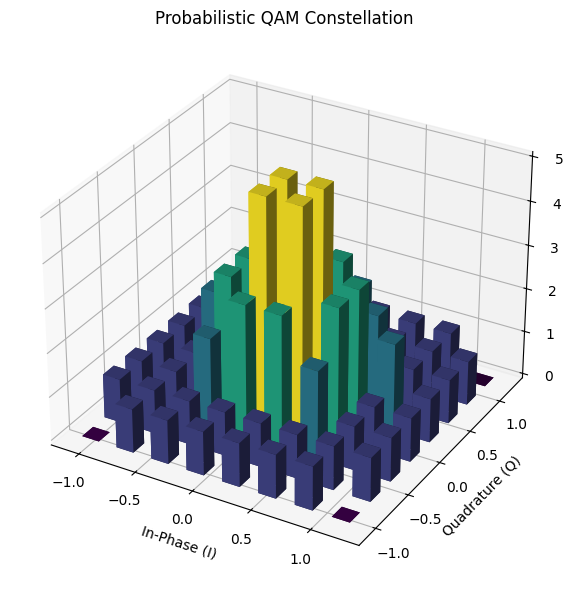

In [27]:
# Gráfico da constelação QAM x probabilidade de cada símbolo
plots.plot_qam_constellation_3d(config["pcs_IQmap"], config["pcs_symFreq"])

### Variância da distribuição

**Comparação com a Variância Gaussiana**

Para uma distribuição Gaussiana verdadeira $\mathcal{CN}(0, \sigma^2)$:

- A variância é $\sigma^2$ por dimensão (real/imaginária).
- A variância total (potência) para o sinal complexo é $2\sigma^2$.

No caso discreto com DM:
- A variância calculada é a potência média total do sinal modulado.

$\mathrm{Var}(S) = \sum_{i=1}^{M} p_i \cdot |s_i|^2$

In [28]:
""" 
Cálculo da variância da distribição em cada etapa do processo de modelagem probabilística:
Variáveis:
config["pcs_pOpt"]: vetor de probabilidades geradas por Maxwell-Boltzman otimizadas para cada símbolo do PCS-QAM
config["pcs_IQmap"]: mapeamento de símbolos do PCS-QAM
config["pcs_symProb"]: lista de probabilidades quantizadas de cada símbolo do PCS-QAM

"""
# Variância dos símbolos das constelações calculada por Maxwell-Boltzman
variance = np.sum(config["pcs_pOpt"] * np.abs(config["pcs_IQmap"])**2)
print(f"Variância dos símbolos das constelações calculado por Maxwell-Boltzman: {variance:.4f}")

# Variância dos símbolos das constelações após quantização
variance_cons = np.sum(config["pcs_symProb"] * np.abs(config["pcs_IQmap"])**2)
print(f"Variância dos símbolos das constelações após quantização: {variance_cons:.4f}")

# Variância dos símbolos transmitidos
variance_sym = np.mean(np.abs(Stx)**2)
print(f"Variância dos símbolos transmitidos: {variance_sym:.4f}")

Variância dos símbolos das constelações calculado por Maxwell-Boltzman: 0.6020
Variância dos símbolos das constelações após quantização: 0.6343
Variância dos símbolos transmitidos: 0.6343


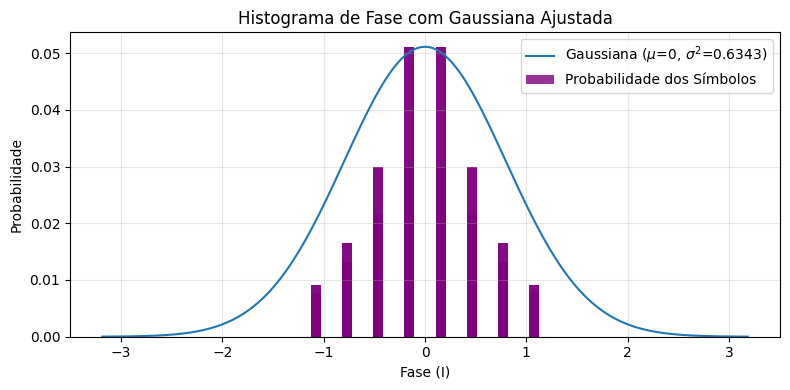

In [29]:
# Gráfico comparando a distribuição Gaussiana com a variância dos símbolos e o vetor de probabilidades calculado por Maxwell-Boltzman
plots.plot_pmf_gaussiana(config["pcs_IQmap"], config["pcs_pOpt"], variance_cons, 0)

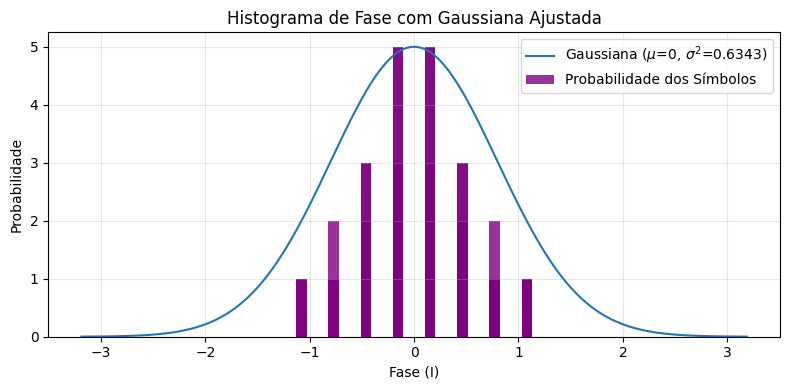

In [30]:
# Gráfico comparando a distribuição Gaussiana com a variância dos símbolos e o vetor de probabilidades após a quantização
plots.plot_pmf_gaussiana(config["pcs_IQmap"], config["pcs_symFreq"], variance_cons, 0)